In [2]:
# Importa las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [22]:
# Carga los archivos CSV
df_taxis = pd.read_csv('moved_project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('moved_project_sql_result_04.csv')
data = pd.read_csv('moved_project_sql_result_07.csv')

# Muestra las primeras filas de cada DataFrame
print(df_taxis.head())
print(df_neighborhoods.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [24]:
# Verificar la información de los DataFrames
print(df_taxis.info())
print(df_neighborhoods.info())

# Si es necesario, convertir las columnas a tipos de datos correctos
df_taxis['trips_amount'] = pd.to_numeric(df_taxis['trips_amount'], errors='coerce')
df_neighborhoods['average_trips'] = pd.to_numeric(df_neighborhoods['average_trips'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [26]:
top_10_neighborhoods = df_neighborhoods.nlargest(10, 'average_trips')

print(top_10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


<Figure size 1000x600 with 0 Axes>

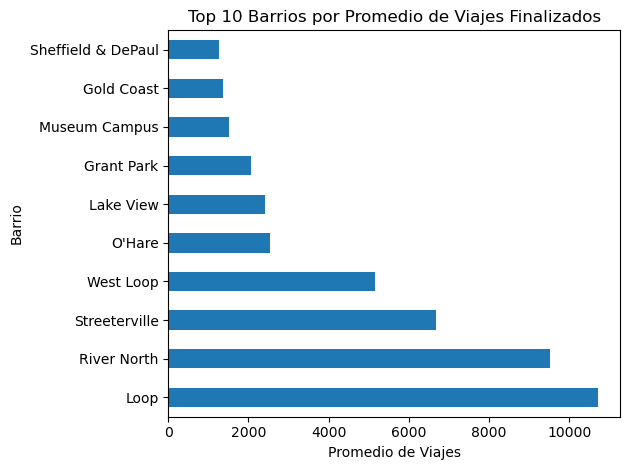

In [28]:
# Ordena los datos y selecciona los 10 principales barrios
top_10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)

# Crear un gráfico de barras para los 10 barrios principales por finalización de viajes
plt.figure(figsize=(10, 6))
top_10_neighborhoods.plot(kind='barh', x='dropoff_location_name', y='average_trips', legend=False)
plt.title('Top 10 Barrios por Promedio de Viajes Finalizados')
plt.xlabel('Promedio de Viajes')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

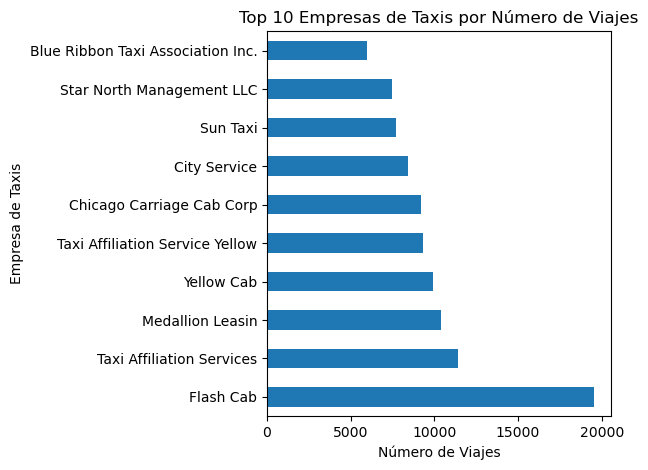

In [30]:
# Crear un gráfico de barras para empresas de taxis y su número de viajes

top_10_taxis = df_taxis.sort_values(by='trips_amount', ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_10_taxis.plot(kind='barh', x='company_name', y='trips_amount', legend=False)
plt.title('Top 10 Empresas de Taxis por Número de Viajes')
plt.xlabel('Número de Viajes')
plt.ylabel('Empresa de Taxis')
plt.tight_layout()
plt.show()

In [32]:
data['start_ts'] = pd.to_datetime(data['start_ts'])
data['weekday'] = data['start_ts'].dt.day_name() 

In [34]:
data['start_ts'] = pd.to_datetime(data['start_ts'])

In [36]:
saturday_rainy = data[(data['weekday'] == 'Saturday') & (data['weather_conditions'] == 'Rain')]
non_saturday_rainy = data[~((data['weekday'] == 'Saturday') & (data['weather_conditions'] == 'Rain'))]

In [38]:
data['duration_seconds'] = pd.to_numeric(data['duration_seconds'], errors='coerce')
print(data['duration_seconds'].isna().sum())

0


In [40]:
duration_saturday_rainy = saturday_rainy['duration_seconds'].dropna()
duration_others = non_saturday_rainy['duration_seconds'].dropna()

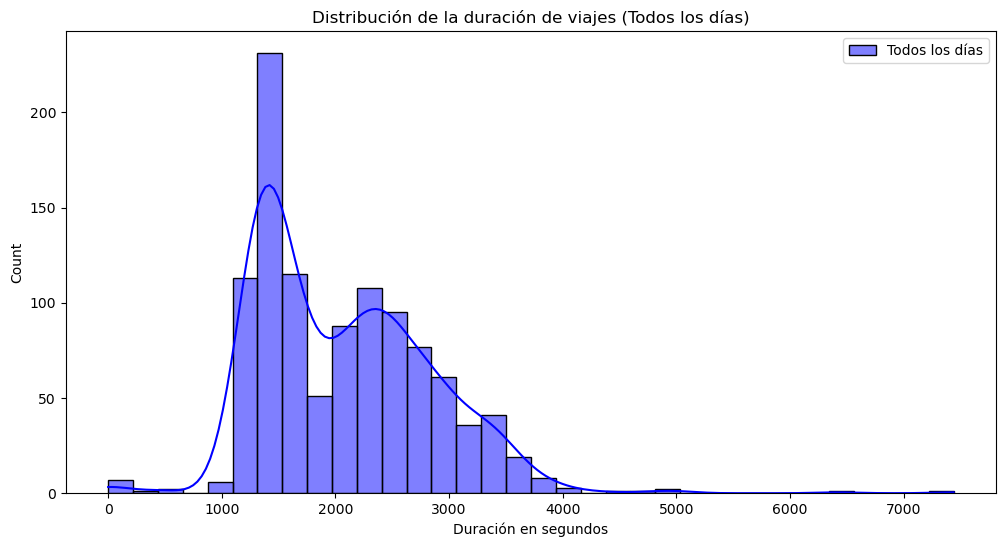

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(data['duration_seconds'].dropna(), kde=True, color='blue', label='Todos los días')
plt.title('Distribución de la duración de viajes (Todos los días)')
plt.xlabel('Duración en segundos')
plt.legend()
plt.show()

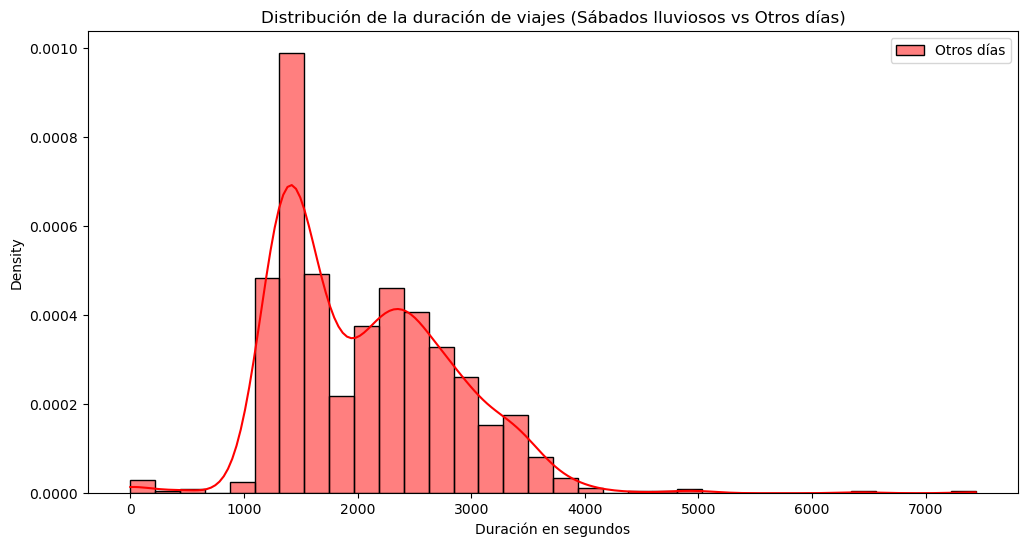

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(duration_saturday_rainy, kde=True, color='green', label='Sábados lluviosos', stat='density')
sns.histplot(duration_others, kde=True, color='red', label='Otros días', stat='density')
plt.title('Distribución de la duración de viajes (Sábados lluviosos vs Otros días)')
plt.xlabel('Duración en segundos')
plt.legend()
plt.show()

In [46]:
var_saturday_rainy = duration_saturday_rainy.var()
var_others = duration_others.var()
print(f"Varianza Sábados lluviosos: {var_saturday_rainy}")
print(f"Varianza Otros días: {var_others}")

Varianza Sábados lluviosos: nan
Varianza Otros días: 592070.4235009099


In [48]:
levene_stat, levene_p = stats.levene(duration_saturday_rainy, duration_others)
print(f"Levene Test - Estadístico: {levene_stat}, P-value: {levene_p}")

Levene Test - Estadístico: nan, P-value: nan


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [50]:
equal_var = levene_p > 0.05 
t_stat, p_value = stats.ttest_ind(duration_saturday_rainy, duration_others, equal_var=equal_var)
alpha = 0.05

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: nan, P-value: nan


In [52]:
if p_value < alpha:
    print("Rechazamos la hipótesis nula: la duración promedio de los viajes cambia los sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente para decir que la duración promedio cambia los sábados lluviosos.")

No podemos rechazar la hipótesis nula: no hay evidencia suficiente para decir que la duración promedio cambia los sábados lluviosos.


# Prueba de Hipótesis

### Hipótesis

- **Hipótesis Nula (H₀)**: La duración promedio de los viajes en sábados lluviosos es igual a la de sábados no lluviosos.

- **Hipótesis Alternativa (H₁)**: La duración promedio de los viajes en sábados lluviosos es diferente a la de sábados no lluviosos.

### Criterio

- **Criterio de Prueba**: 
  Se usará una prueba t de dos muestras independientes para comparar las duraciones. Se evaluará la igualdad de varianzas utilizando la prueba de Levene. Si el valor p es menor que α = 0.05, rechazaremos la hipótesis nula, indicando que hay evidencia suficiente de una diferencia en las duraciones promedio.
